<a href="https://colab.research.google.com/github/arizonaCameraLab/computationalImaging/blob/master/Chapter8FocalImaging/IncoherentDefocus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defocus in Incoherent Imaging Systems
## David Brady
## University of Arizona
## February 2025

This note book analyzes 3D scenes captured with with defocus in incoherent imaging.


## libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from skimage import io
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
plt.rcParams.update({'font.size': 22})
from google.colab import files
from scipy.special import jn, jn_zeros


In [3]:
def jinc(x):
  # impulse response
  ji=2*jn(1,np.pi*(x+10**(-8)))/(np.pi*(x+10**(-8)))
  return ji
def pupil(x):
  p=1-np.heaviside(np.abs(x)-.5,0)
  return p

## Image transformations

This notebook repeats the image transformations shown for coherent fields in https://github.com/arizonaCameraLab/computationalImaging/blob/master/Chapter6CoherentSystems/CoherentDefocus.ipynb for an incoherent object model. We achieve this by making the psf the square of the coherent psf. A critical difference is that the input field Z must be nonnegative in incoherent systems.

Text(0.5, 1.0, 'ten waves')

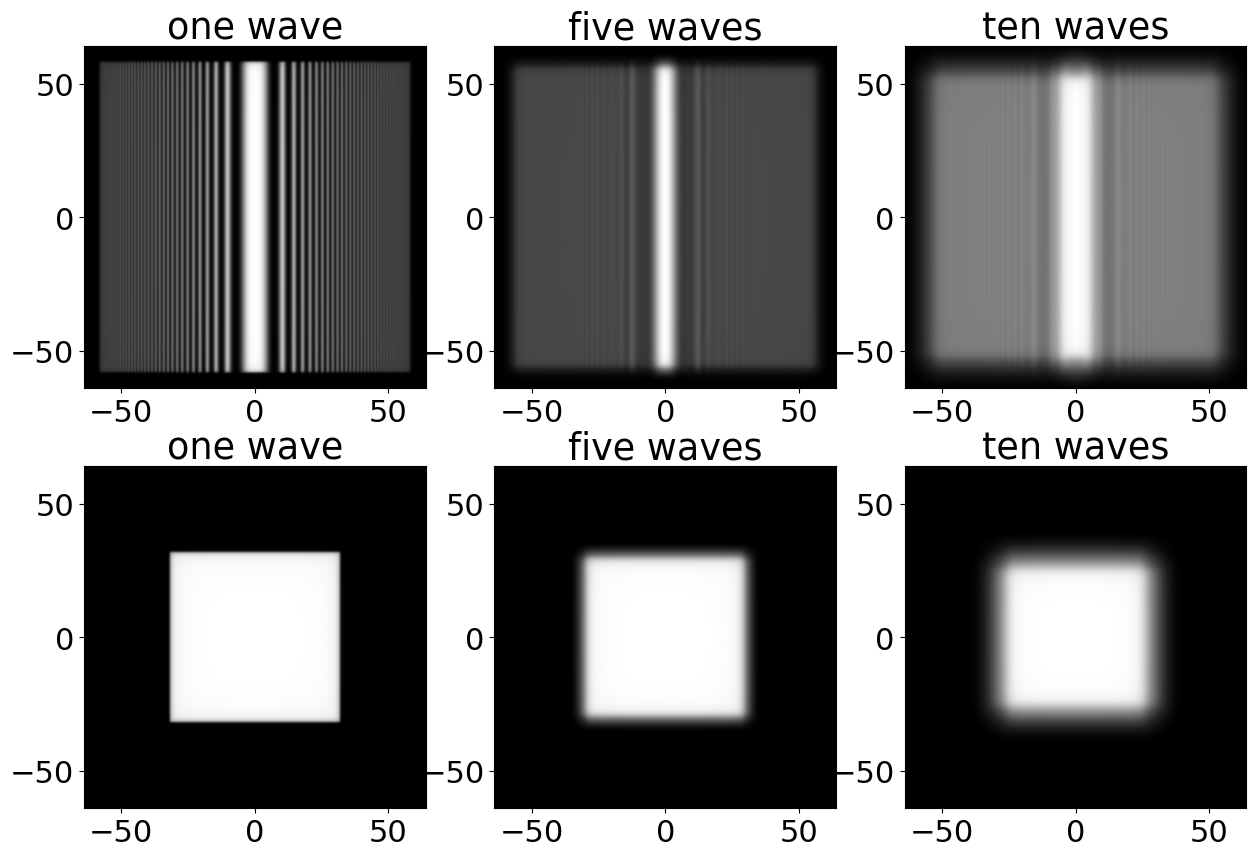

In [11]:
plt.rcParams['figure.figsize'] = [15, 10]
X=64
N=1024
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N),np.int16(N))/(2*N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
alpha=1./128.
Z = 1+np.cos(2*np.pi*alpha*x**2)
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3)
# one wave defocus
w20=1
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax1.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax1.set_title('one wave')
# 2 wave defocus
w20=5
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax2.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax2.set_title('five waves')
# 10 wave defocus
w20=10
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax3.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax3.set_title('ten waves')
# different object
Z=np.zeros((N,N))
Z[np.int16(N/4):np.int16(3*N/4),np.int16(N/4):np.int16(3*N/4)]=1
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
# one wave defocus
w20=1
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]**2
ax4.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax4.set_title('one wave')
# 2 wave defocus
w20=5
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]**2
ax5.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax5.set_title('five waves')
# 10 wave defocus
w20=10
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]**2
ax6.imshow(zzFiltered, cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax6.set_title('ten waves')
#plt.savefig('defocusChirp.pdf')
#files.download('defocusChirp.pdf')


## comparing cross sections

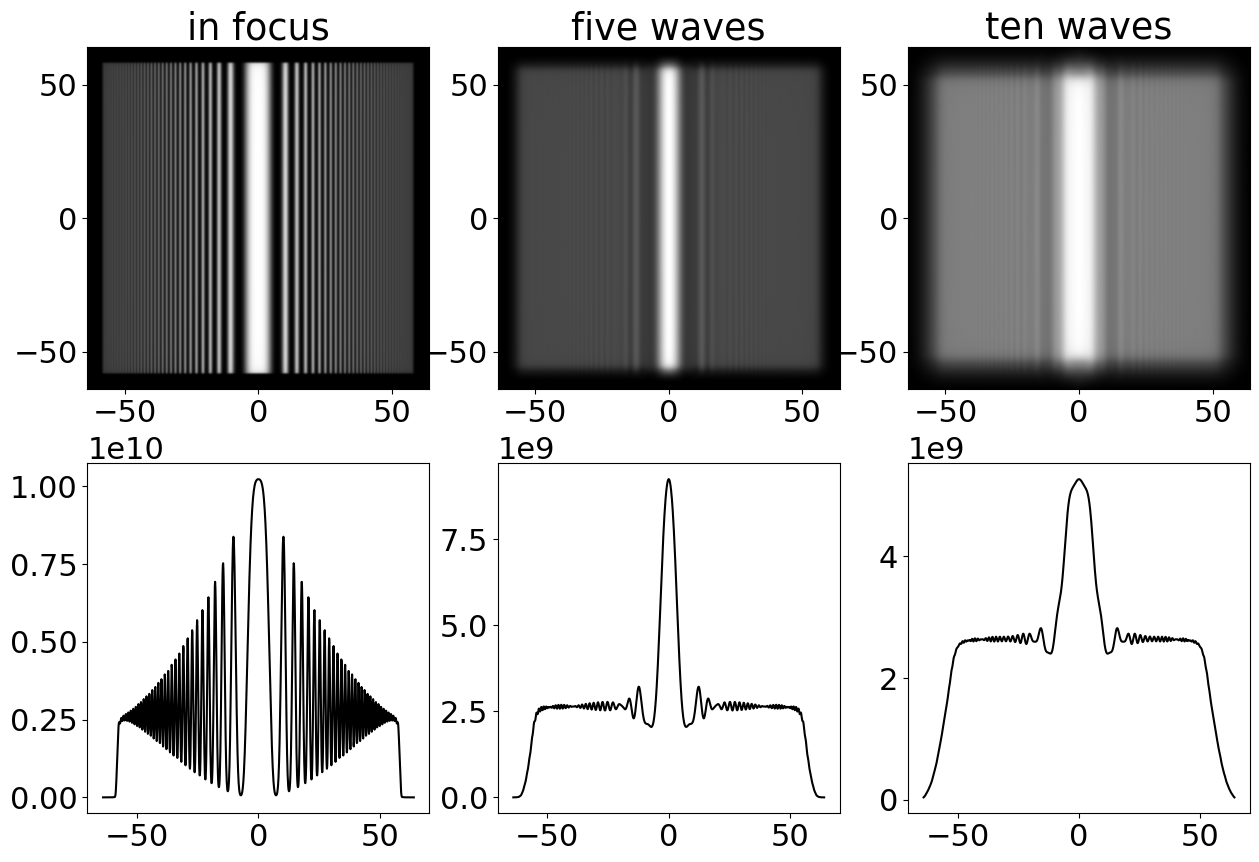

In [12]:
plt.rcParams['figure.figsize'] = [15, 10]
X=64
N=1024
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N),np.int16(N))/(2*N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
alpha=1./128.
Z = 1+np.cos(2*np.pi*alpha*x**2)
zz=np.zeros((2*N,2*N))
zz[np.int16(N/2):np.int16(3*N/2),np.int16(N/2):np.int16(3*N/2)]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3)
# one wave defocus
w20=0
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.fft.ifft2(np.fft.ifftshift(zzftFiltered))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax1.imshow(np.abs(zzFiltered), cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax1.set_title('in focus')
ax4.plot(np.linspace(-64,64,zzFiltered.shape[1]),np.real(zzFiltered[np.int16(zzFiltered.shape[0]/2),:]),'k')
# 2 wave defocus
w20=5
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.fft.ifft2(np.fft.ifftshift(zzftFiltered))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax2.imshow(np.abs(zzFiltered), cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax2.set_title('five waves')
ax5.plot(np.linspace(-64,64,zzFiltered.shape[1]),np.real(zzFiltered[np.int16(zzFiltered.shape[0]/2),:]),'k')
# 10 wave defocus
w20=10
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.fft.ifft2(np.fft.ifftshift(zzftFiltered))[np.int16(N/2-50):np.int16(3*N/2+50),np.int16(N/2-50):np.int16(3*N/2+50)]**2
ax3.imshow(np.abs(zzFiltered), cmap='gray', extent=[-64,64,-64,64], aspect='equal')
ax3.set_title('ten waves')
ax6.plot(np.linspace(-64,64,zzFiltered.shape[1]),np.real(zzFiltered[np.int16(zzFiltered.shape[0]/2),:]),'k')
#plt.savefig('chirpDefocus.pdf')


### Diffuse object

In [8]:

!wget --no-check-certificate --content-disposition 'https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/dubaiBridge.jpg'


--2025-02-15 17:12:47--  https://github.com/djbradyAtOpticalSciencesArizona/computationalImaging/raw/master/images/dubaiBridge.jpg
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/dubaiBridge.jpg [following]
--2025-02-15 17:12:48--  https://raw.githubusercontent.com/djbradyAtOpticalSciencesArizona/computationalImaging/master/images/dubaiBridge.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2542532 (2.4M) [image/jpeg]
Saving to: ‘dubaiBridge.jpg’

dubaiBridge.jpg     100%[===================>]   2.42M  --.-KB/s    in 0.1s    


In [16]:
pop=io.imread('dubaiBridge.jpg',as_gray=True)
pop=pop[:,0:1868]
pop=cv2.resize(pop,(512,512))
pop=pop/np.max(pop)

Text(0.5, 1.0, '10 waves defocus')

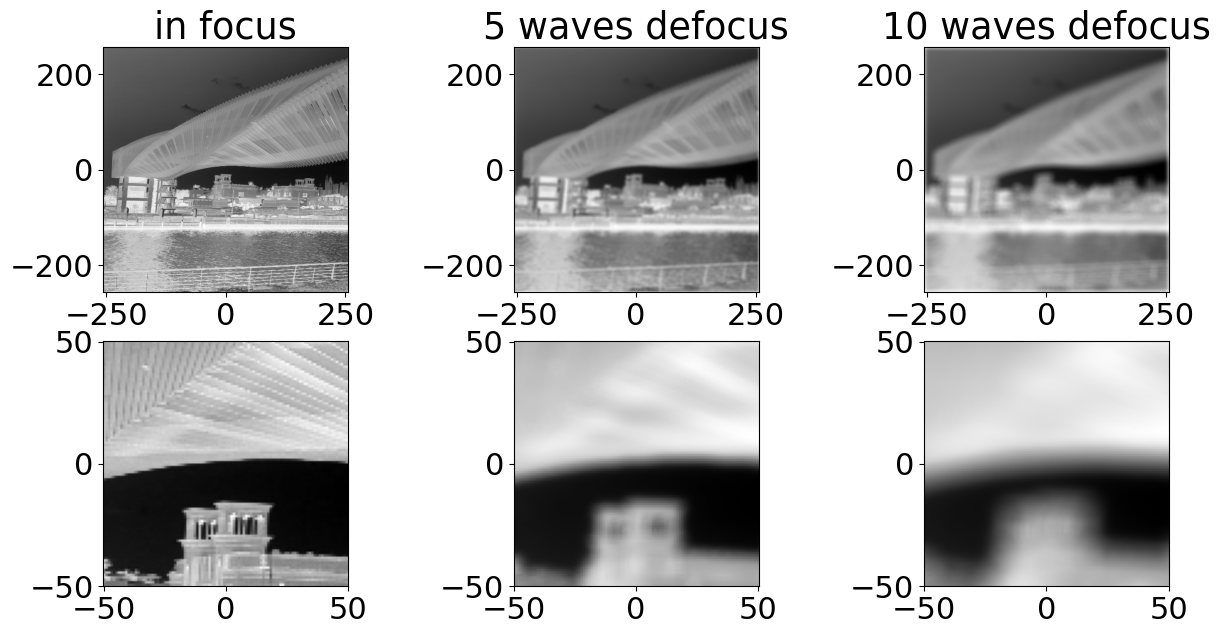

In [18]:
fig, [[ax1, ax2, ax3], [ax4, ax5, ax6]] = plt.subplots(2,3)
plt.rcParams['figure.figsize'] = [15, 7]
X=256
N=512
side = np.linspace(-X, X, N)
dx=side[2]-side[1]
u = np.arange(-np.int16(N),np.int16(N))/(2*N*dx)
x, y = np.meshgrid(side, side)
U, V= np.meshgrid(u,u)
Z=pop
zz=np.zeros((1024,1024)).astype('complex128')
zz[256:768,256:768]=Z
zzft=np.fft.fftshift(np.fft.fft2(zz))
# in focus wave
w20=0
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax1.imshow(zzFiltered, cmap='binary', extent=[-X,X,-X,X], aspect='equal')
ax4.imshow(zzFiltered[200:300,200:300], cmap='binary', extent=[-50*dx,50*dx,-50*dx,50*dx], aspect='equal')
ax1.set_title('in focus')
# 5 waves
w20=5
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax2.imshow(zzFiltered, cmap='binary', extent=[-X,X,-X,X], aspect='equal')
ax5.imshow(zzFiltered[200:300,200:300], cmap='binary', extent=[-50*dx,50*dx,-50*dx,50*dx], aspect='equal')
ax2.set_title('5 waves defocus')
# ten waves
w20=10
H = np.exp(2*np.pi*1j*w20*(U**2+V**2))*pupil(np.sqrt(U**2+V**2))
h=np.abs(np.fft.fftshift(np.fft.fft2(np.fft.fftshift(H))))**2
H=np.fft.fftshift(np.fft.ifft2(np.fft.fftshift(h)))
zzftFiltered=zzft*H
zzFiltered=np.abs(np.fft.ifft2(np.fft.ifftshift(zzftFiltered)))[256:768,256:768]
ax3.imshow(zzFiltered, cmap='binary', extent=[-X,X,-X,X], aspect='equal')
ax6.imshow(zzFiltered[200:300,200:300], cmap='binary', extent=[-50*dx,50*dx,-50*dx,50*dx], aspect='equal')
ax3.set_title('10 waves defocus')
#plt.savefig('defocusSpeckle.pdf')
#files.download('defocusSpeckle.pdf')